<a href="https://colab.research.google.com/github/salargaj/MIT-Projects-/blob/main/MITAutoHub_PCA_and_tSNE_Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA and t-SNE Project: Auto MPG**

-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.


-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### **Loading the data**

In [ ]:
data = pd.read_csv("/auto-mpg.csv")

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Checking the info of the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


## **Observations:**

- There are **398 observations and 8 columns** in the data.
- **All variables except horsepower and car name are of numeric data type.**
- The horsepower must be a numeric data type. We will explore this further.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking the unique values in the 'car name' column**

In [ ]:
data["car name"].nunique()

305

In [ ]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

### **Checking values in the horsepower column**

In [ ]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are **6 observations where horsepower is ?**. We can consider these values as **missing values**.
- We can **impute these missing values and change the data type** of horsepower column.
- First, we need to **replace the ? with np.nan**.

In [ ]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [ ]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)

data['horsepower'] = data['horsepower'].astype('float64')  # Converting the horsepower column from object data type to float



### **Summary Statistics**

In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### **Checking the distribution and outliers for each column in the data**

mpg
Skew : 0.46


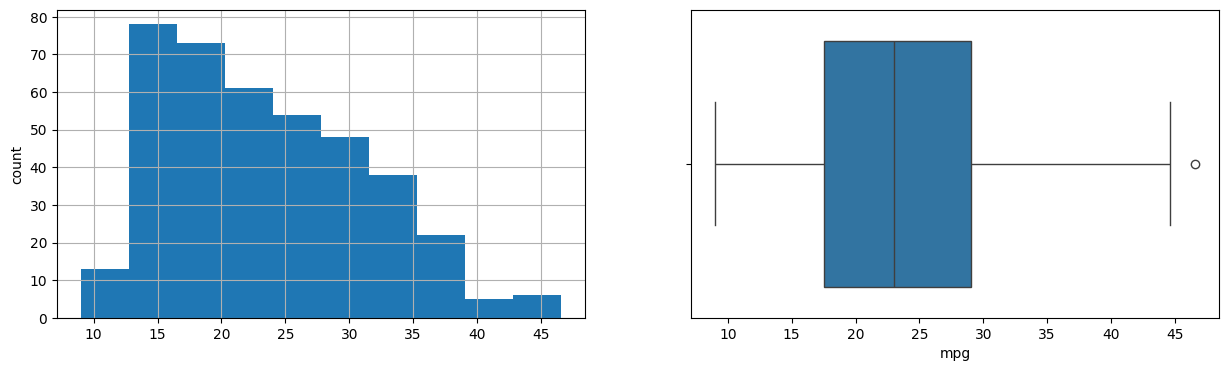

cylinders
Skew : 0.53


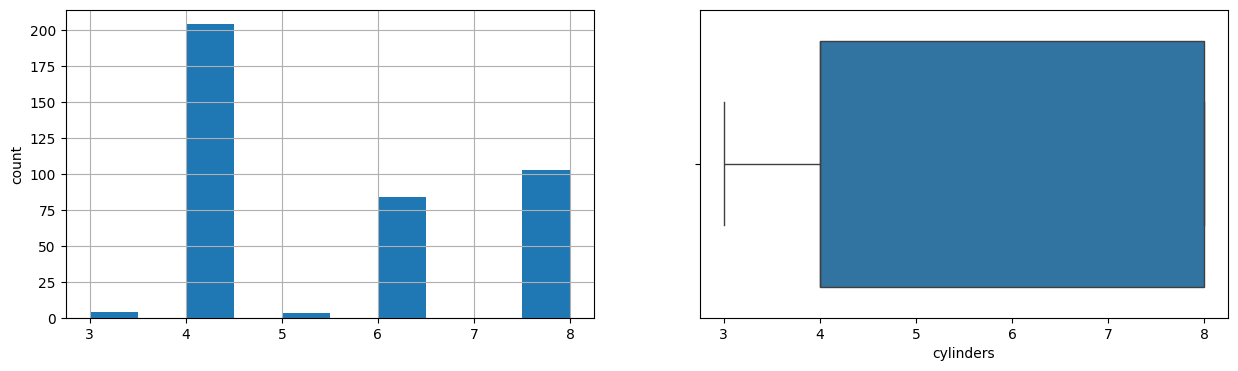

displacement
Skew : 0.72


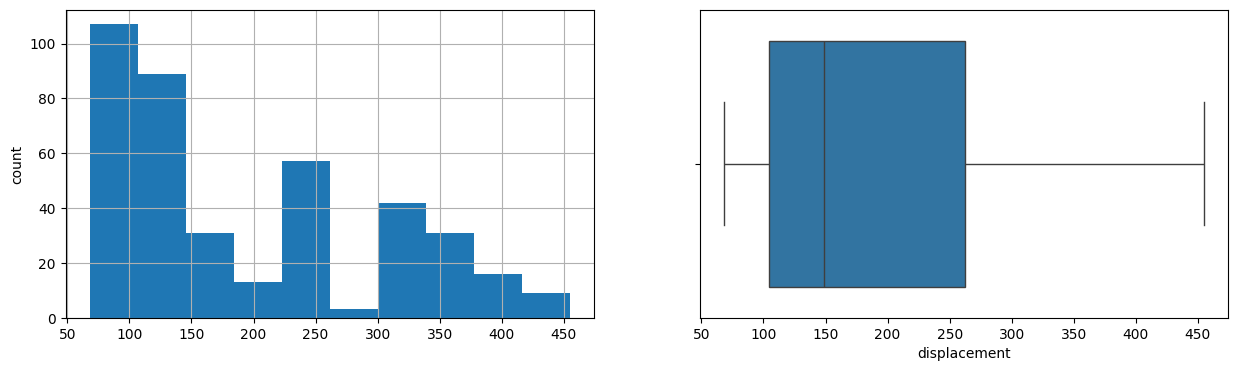

horsepower
Skew : 1.11


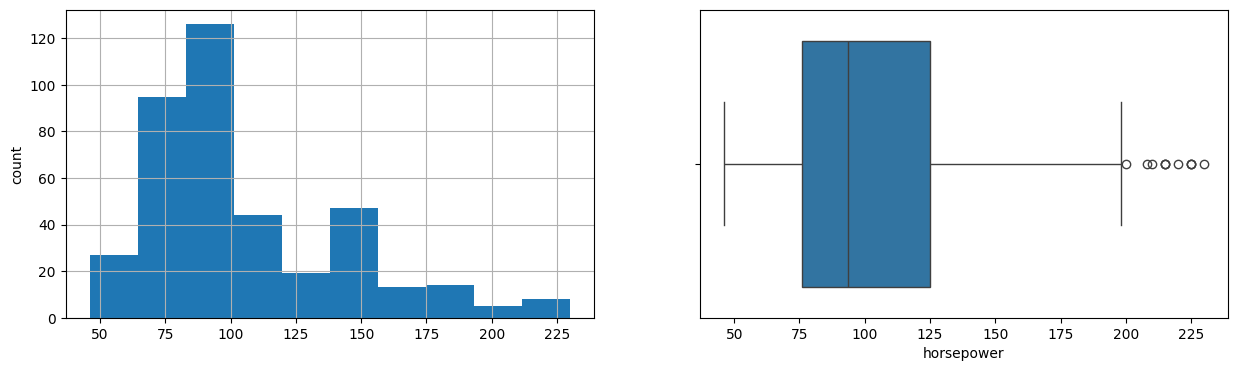

weight
Skew : 0.53


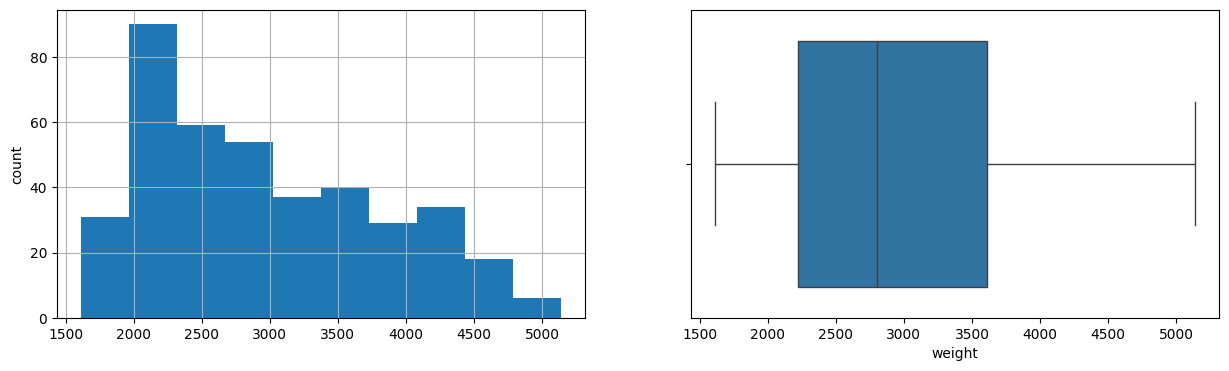

acceleration
Skew : 0.28


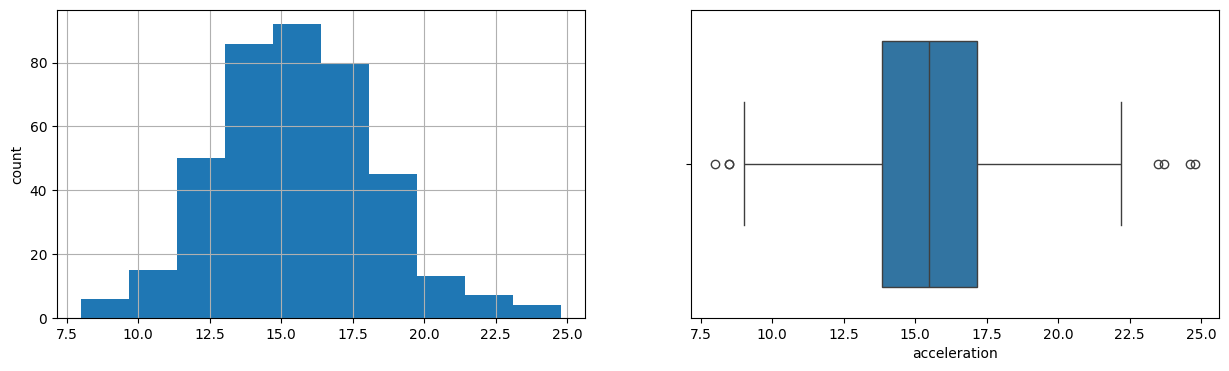

model year
Skew : 0.01


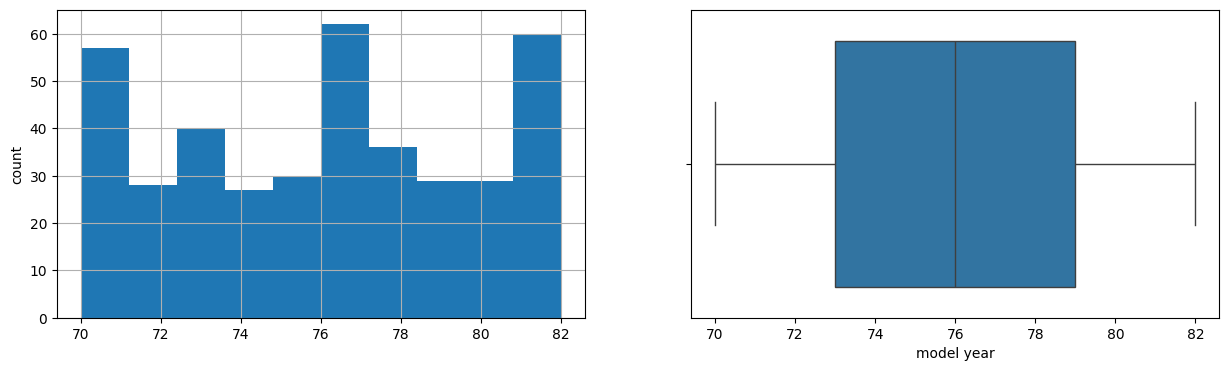

In [ ]:

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist()

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

### **Checking the correlation**

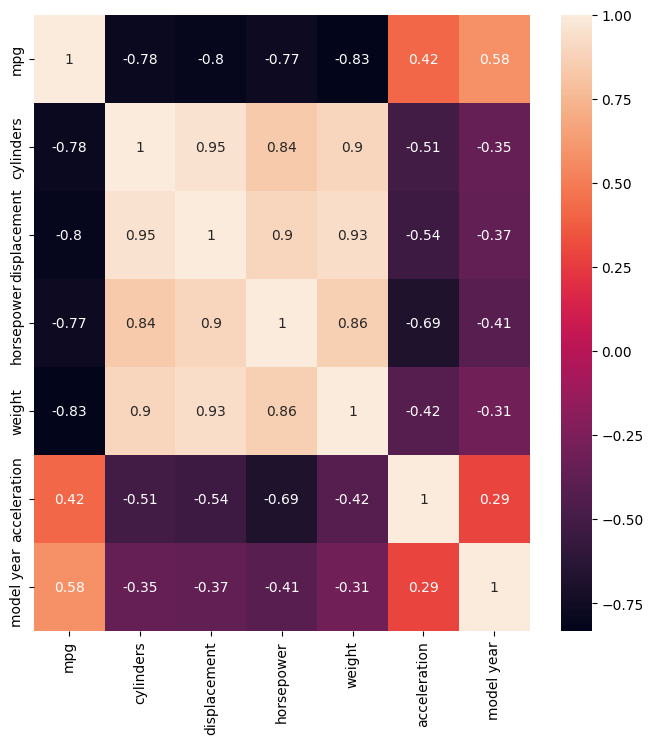

In [ ]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True)

plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg.

### **Scaling the data**

In [ ]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [ ]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


from matplotlib import pyplot as plt
_df_0['mpg'].plot(kind='hist', bins=20, title='mpg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['displacement'].plot(kind='hist', bins=20, title='displacement')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['horsepower'].plot(kind='hist', bins=20, title='horsepower')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['weight'].plot(kind='hist', bins=20, title='weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mpg', y='displacement', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='displacement', y='horsepower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='horsepower', y='weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='weight', y='acceleration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cylinders']
  ys = series['mpg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('cylinders', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cylinders')
_ = plt.ylabel('mpg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cylinders']
  ys = series['displacement']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('cylinders', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cylinders')
_ = plt.ylabel('displacement')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cylinders']
  ys = series['horsepower']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('cylinders', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cylinders')
_ = plt.ylabel('horsepower')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cylinders']
  ys = series['weight']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('cylinders', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cylinders')
_ = plt.ylabel('weight')

from matplotlib import pyplot as plt
_df_12['mpg'].plot(kind='line', figsize=(8, 4), title='mpg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['displacement'].plot(kind='line', figsize=(8, 4), title='displacement')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['horsepower'].plot(kind='line', figsize=(8, 4), title='horsepower')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['weight'].plot(kind='line', figsize=(8, 4), title='weight')
plt.gca().spines[['top', 'right']].set_visible(False)

## **Principal Component Analysis**

#### **Applying the PCA algorithm with number of components equal to the total number of columns in the data**

In [ ]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
# Apply the PCA algorithm with random_state = 1
pca = PCA(n_components=n, random_state=1)

# Fit and transform the pca function on scaled data
data_pca = pca.fit_transform(data_scaled)
data_pca1 = pd.DataFrame(data_pca)

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

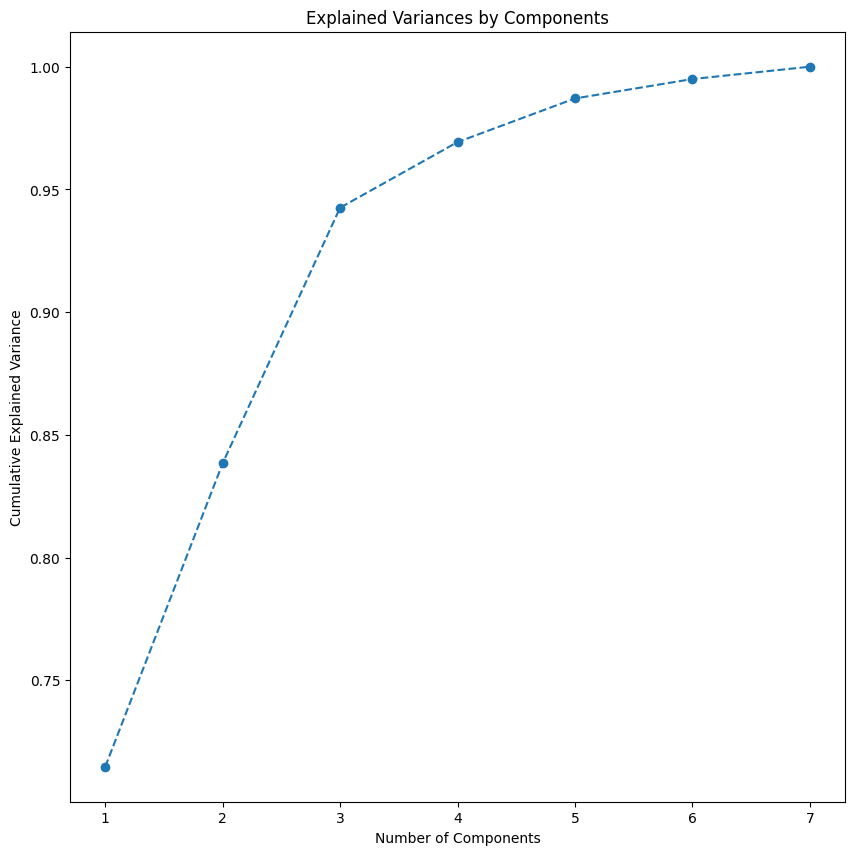

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


In [ ]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


#### **Interpreting the coefficients of the first three principal components**

In [ ]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'

    elif val >= 0.40:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


#### We can also visualize the data in 2 dimensions using the first two principal components

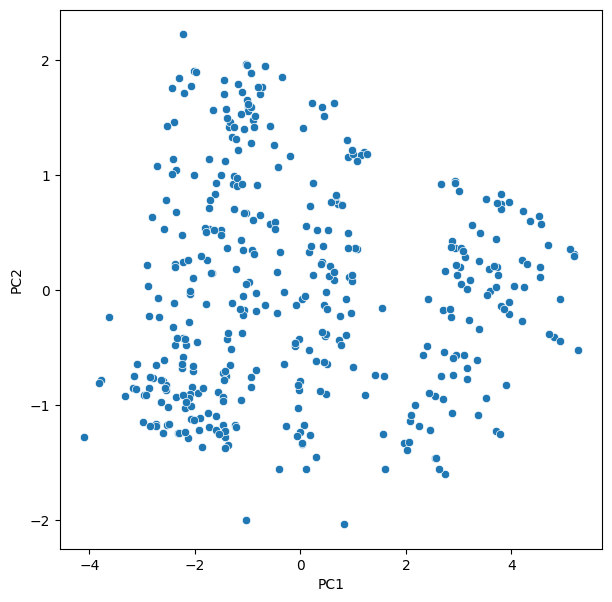

In [ ]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

## **t-SNE**

In [ ]:
# Apply the t-SNE algorithm with random_state = 1
tsne = TSNE(random_state=1)

# Fit and transform t-SNE function on the scaled data
data_tsne = tsne.fit_transform(data_scaled)

In [ ]:
data_tsne.shape

(398, 2)

In [ ]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [ ]:
data_tsne.head()

,Component 1,Component 2
0,37.579971,2.138400
1,38.064915,0.073901
2,38.115463,1.203496
3,37.521984,1.321069
4,38.225060,1.684076


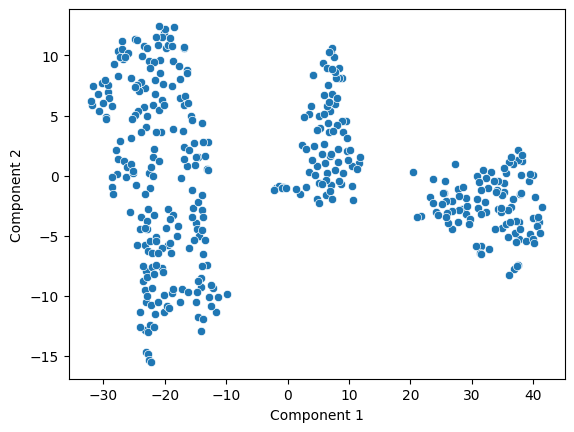

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

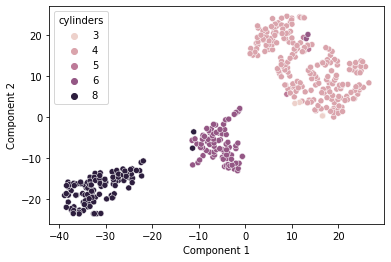

In [ ]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

In [ ]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']

    second_component = x['Component 2']

    if (first_component > 0) and (second_component > -5):
        return 'group_1'

    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'

    else:
        return 'group_3'

In [ ]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

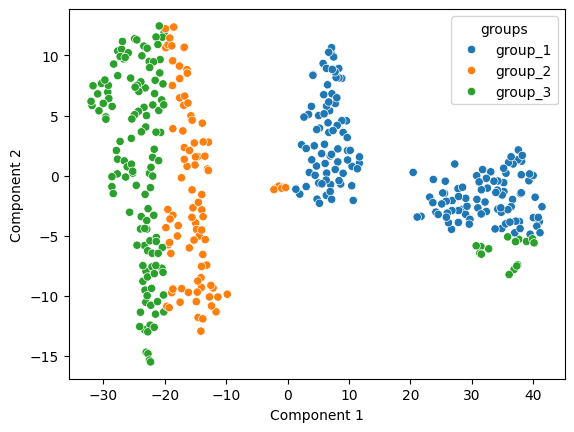

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [ ]:
data['groups'] = data_tsne['groups']

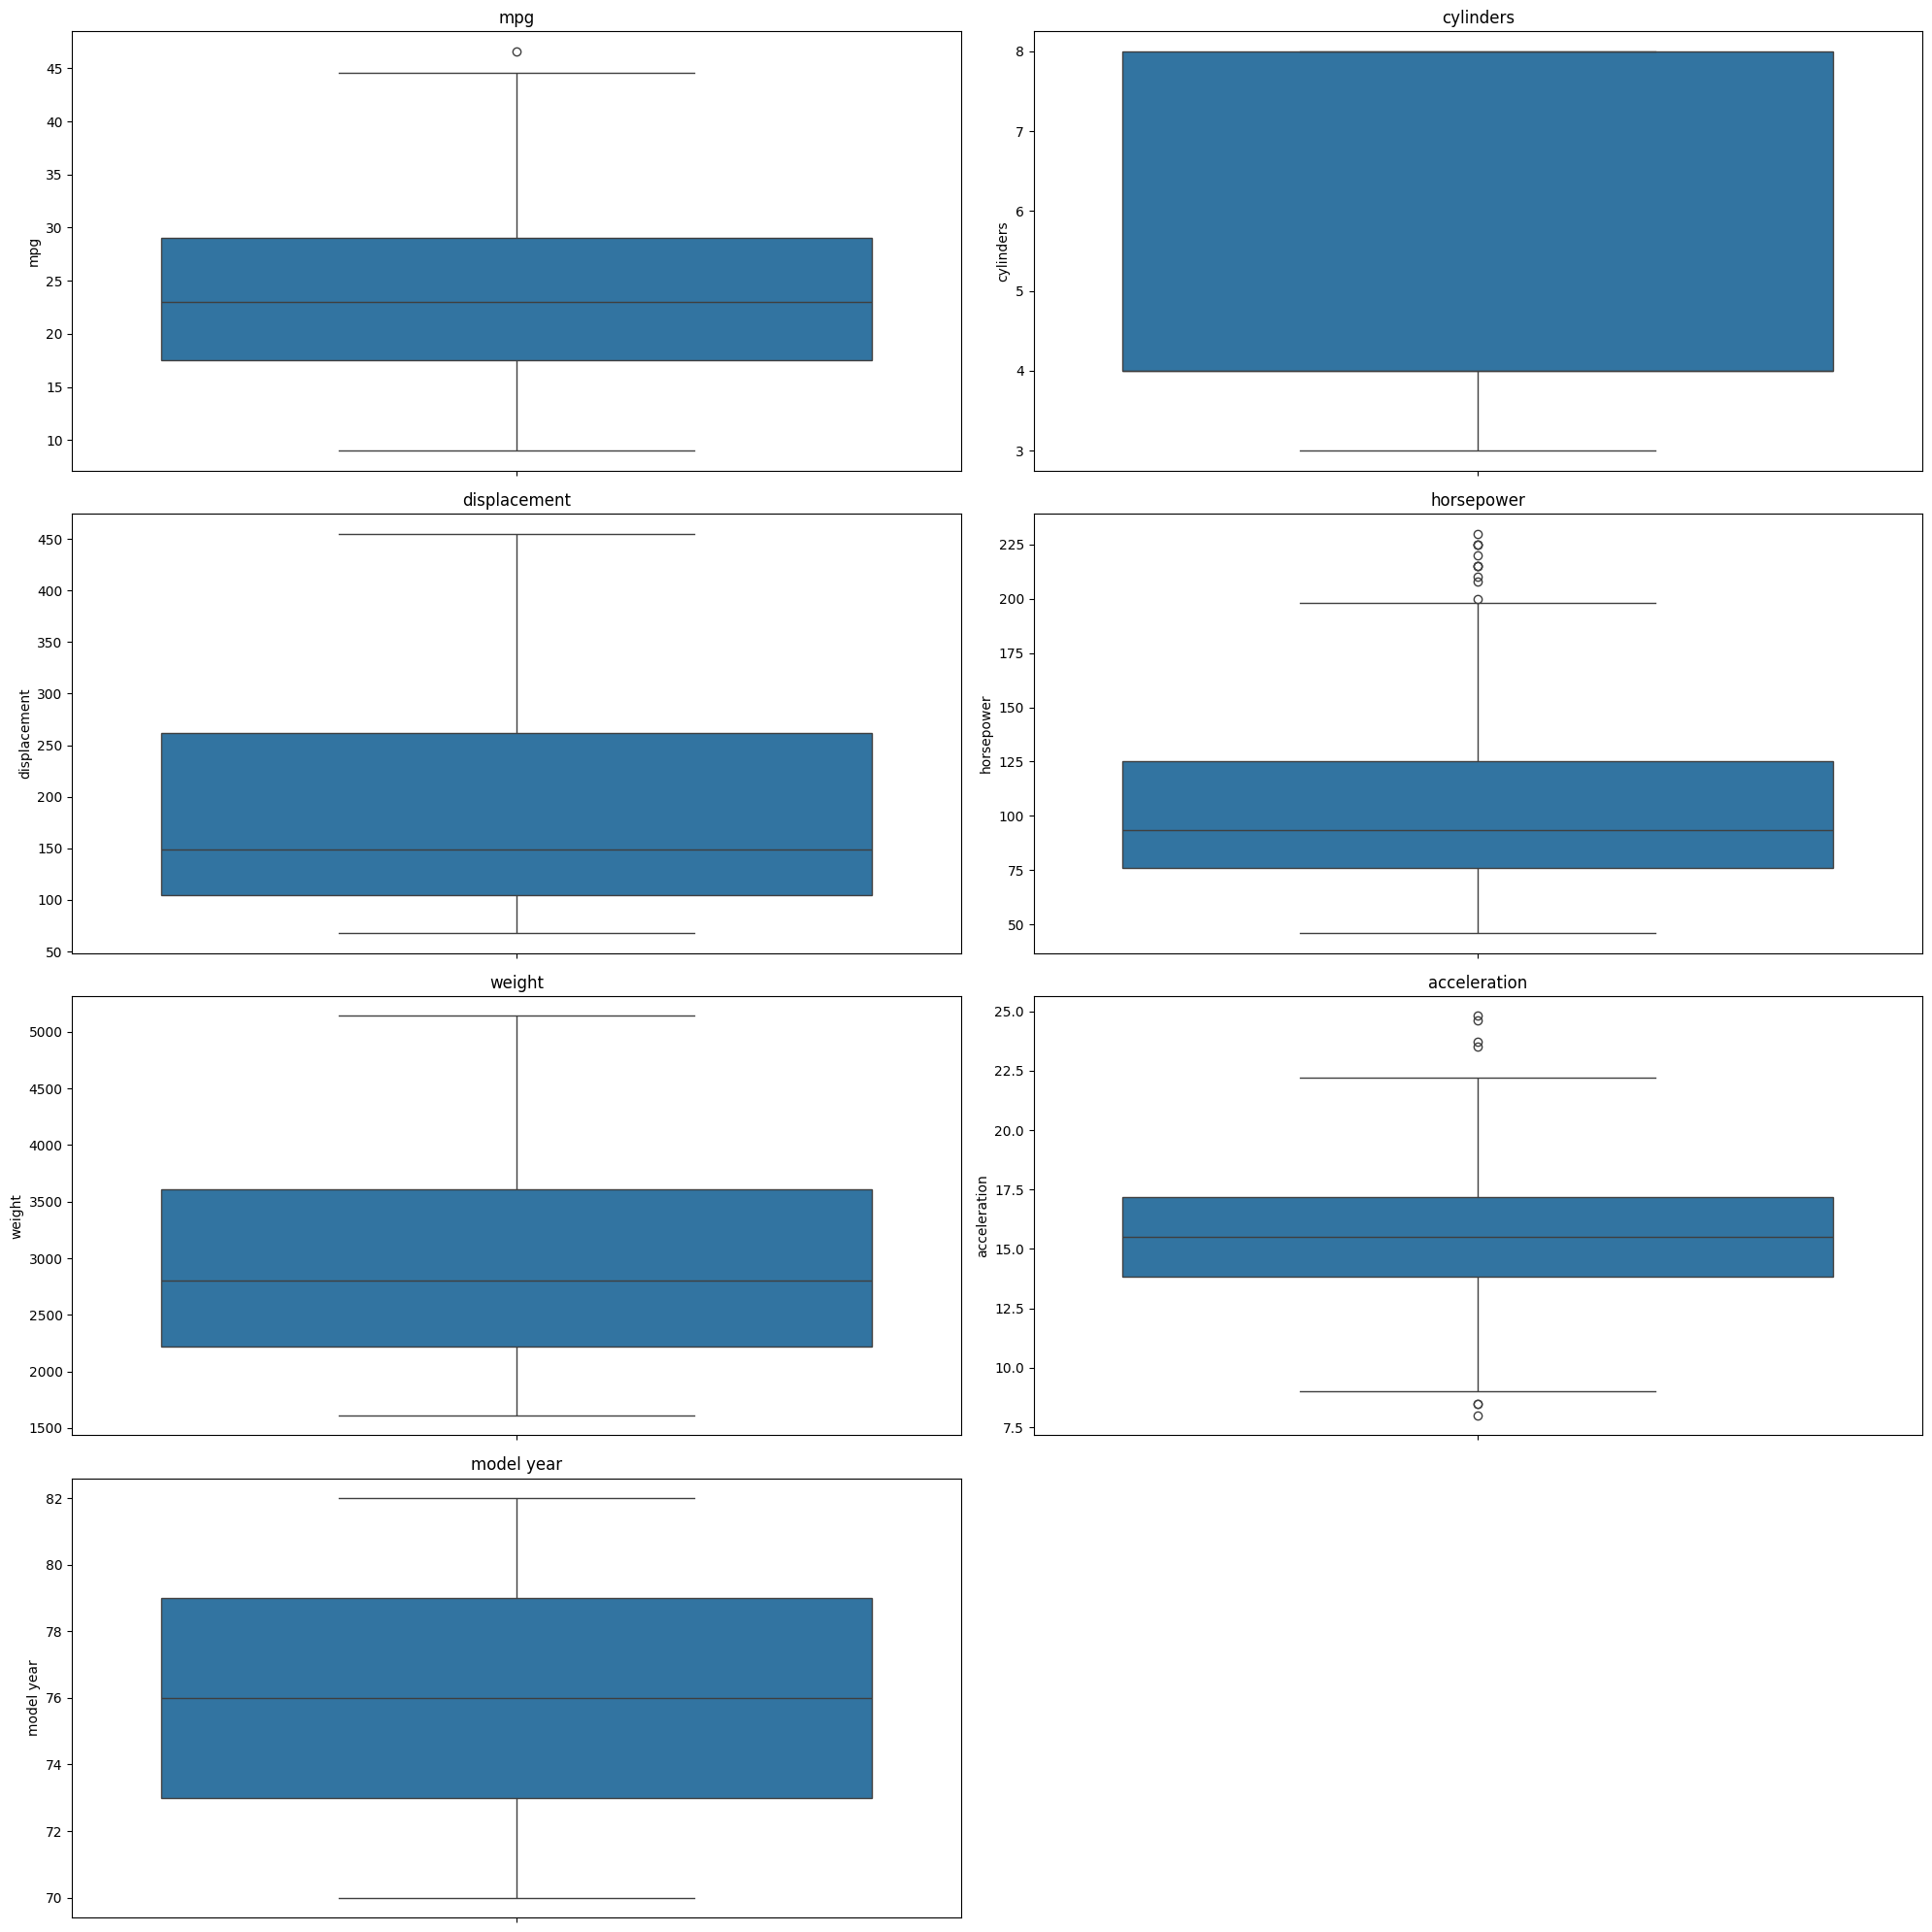

In [ ]:
all_col = data.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_col):
    if i == 7:
        break

    plt.subplot(4, 2, i + 1)

    sns.boxplot(y=data[variable])

    plt.tight_layout()

    plt.title(variable)

plt.show()